In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12872287852622295055
xla_global_id: -1
]


In [12]:
import pandas as pd

# Using raw string for the file path
diagnosis = pd.read_csv(r'C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_Challenge_diagnosis.csv')
diagnosis

,ID,Symptom
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [13]:
diag = diagnosis.to_dict()
ids = list(diag['ID'].values())
print('Number of instances: ', len(ids))
symp = list(diag['Symptom'].values())


Number of instances:  126


In [16]:
import librosa
import librosa.display
import glob


In [30]:
import glob
import librosa
import pandas as pd
# Assuming ids and symp are defined elsewhere in your code

dataset = []
for filename in glob.iglob('C:\\Users\\ab2814\\Desktop\\ML\\ICBHI\\ICBHI\\ICBHI_final_database\\*.wav'):  # Added \\*.wav to the path
    if filename[-4:] == '.wav':
        identity = filename.split('\\')[-1][:3]  # Changed / to \\ for Windows paths
        try:
            index = ids.index(int(identity))
            label = symp[index]
            duration = librosa.get_duration(filename=filename)

            if duration >= 3:
                slice_size = 3
                iterations = int((duration - slice_size) / (slice_size - 1))
                iterations += 1
                # initial_offset is the starting point of the recording
                initial_offset = (duration - ((iterations * (slice_size - 1)) + 1)) / 2
                for i in range(iterations):
                    # starting point of the slice from the initial_offset of the recording
                    offset = initial_offset + i * (slice_size - 1)
                    dataset.append({"filename": filename, "label": label, "offset": offset})
        except ValueError:
            print(f"Skipping file {filename} due to invalid identity: {identity}")

# Convert dataset to DataFrame
dataset = pd.DataFrame(dataset)
dataset.info()  # Displays dataset information

# If shuffling is needed, uncomment the next line
# dataset = shuffle(dataset, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  8965 non-null   object 
 1   label     8965 non-null   object 
 2   offset    8965 non-null   float64
dtypes: float64(1), object(2)
memory usage: 210.2+ KB


In [31]:
dataset.head()

,filename,label,offset
0,C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_f...,URTI,0.5
1,C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_f...,URTI,2.5
2,C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_f...,URTI,4.5
3,C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_f...,URTI,6.5
4,C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_f...,URTI,8.5


In [32]:
import matplotlib.pyplot as plt

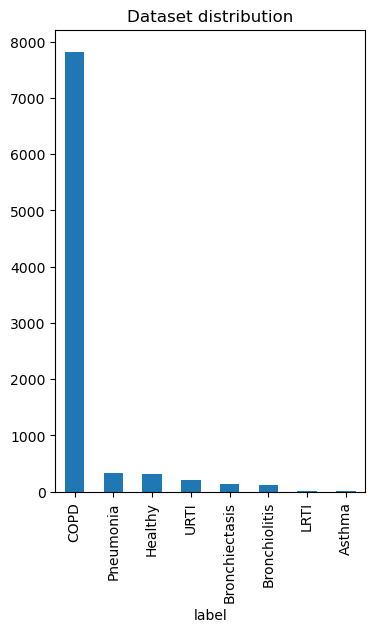

In [33]:
plt.figure(figsize=(4,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()



In [34]:
#Split train and test data
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 7172
Test: 1793


C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\101_1b1_Al_sc_Meditron.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\102_1b1_Ar_sc_Meditron.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\103_2b2_Ar_mc_LittC2SE.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\104_1b1_Al_sc_Litt3200.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\108_1b1_Al_sc_Meditron.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\111_1b2_Tc_sc_Meditron.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\122_2b1_Al_mc_LittC2SE.wav
C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database\149_1b1_Al_sc_Meditron.wav


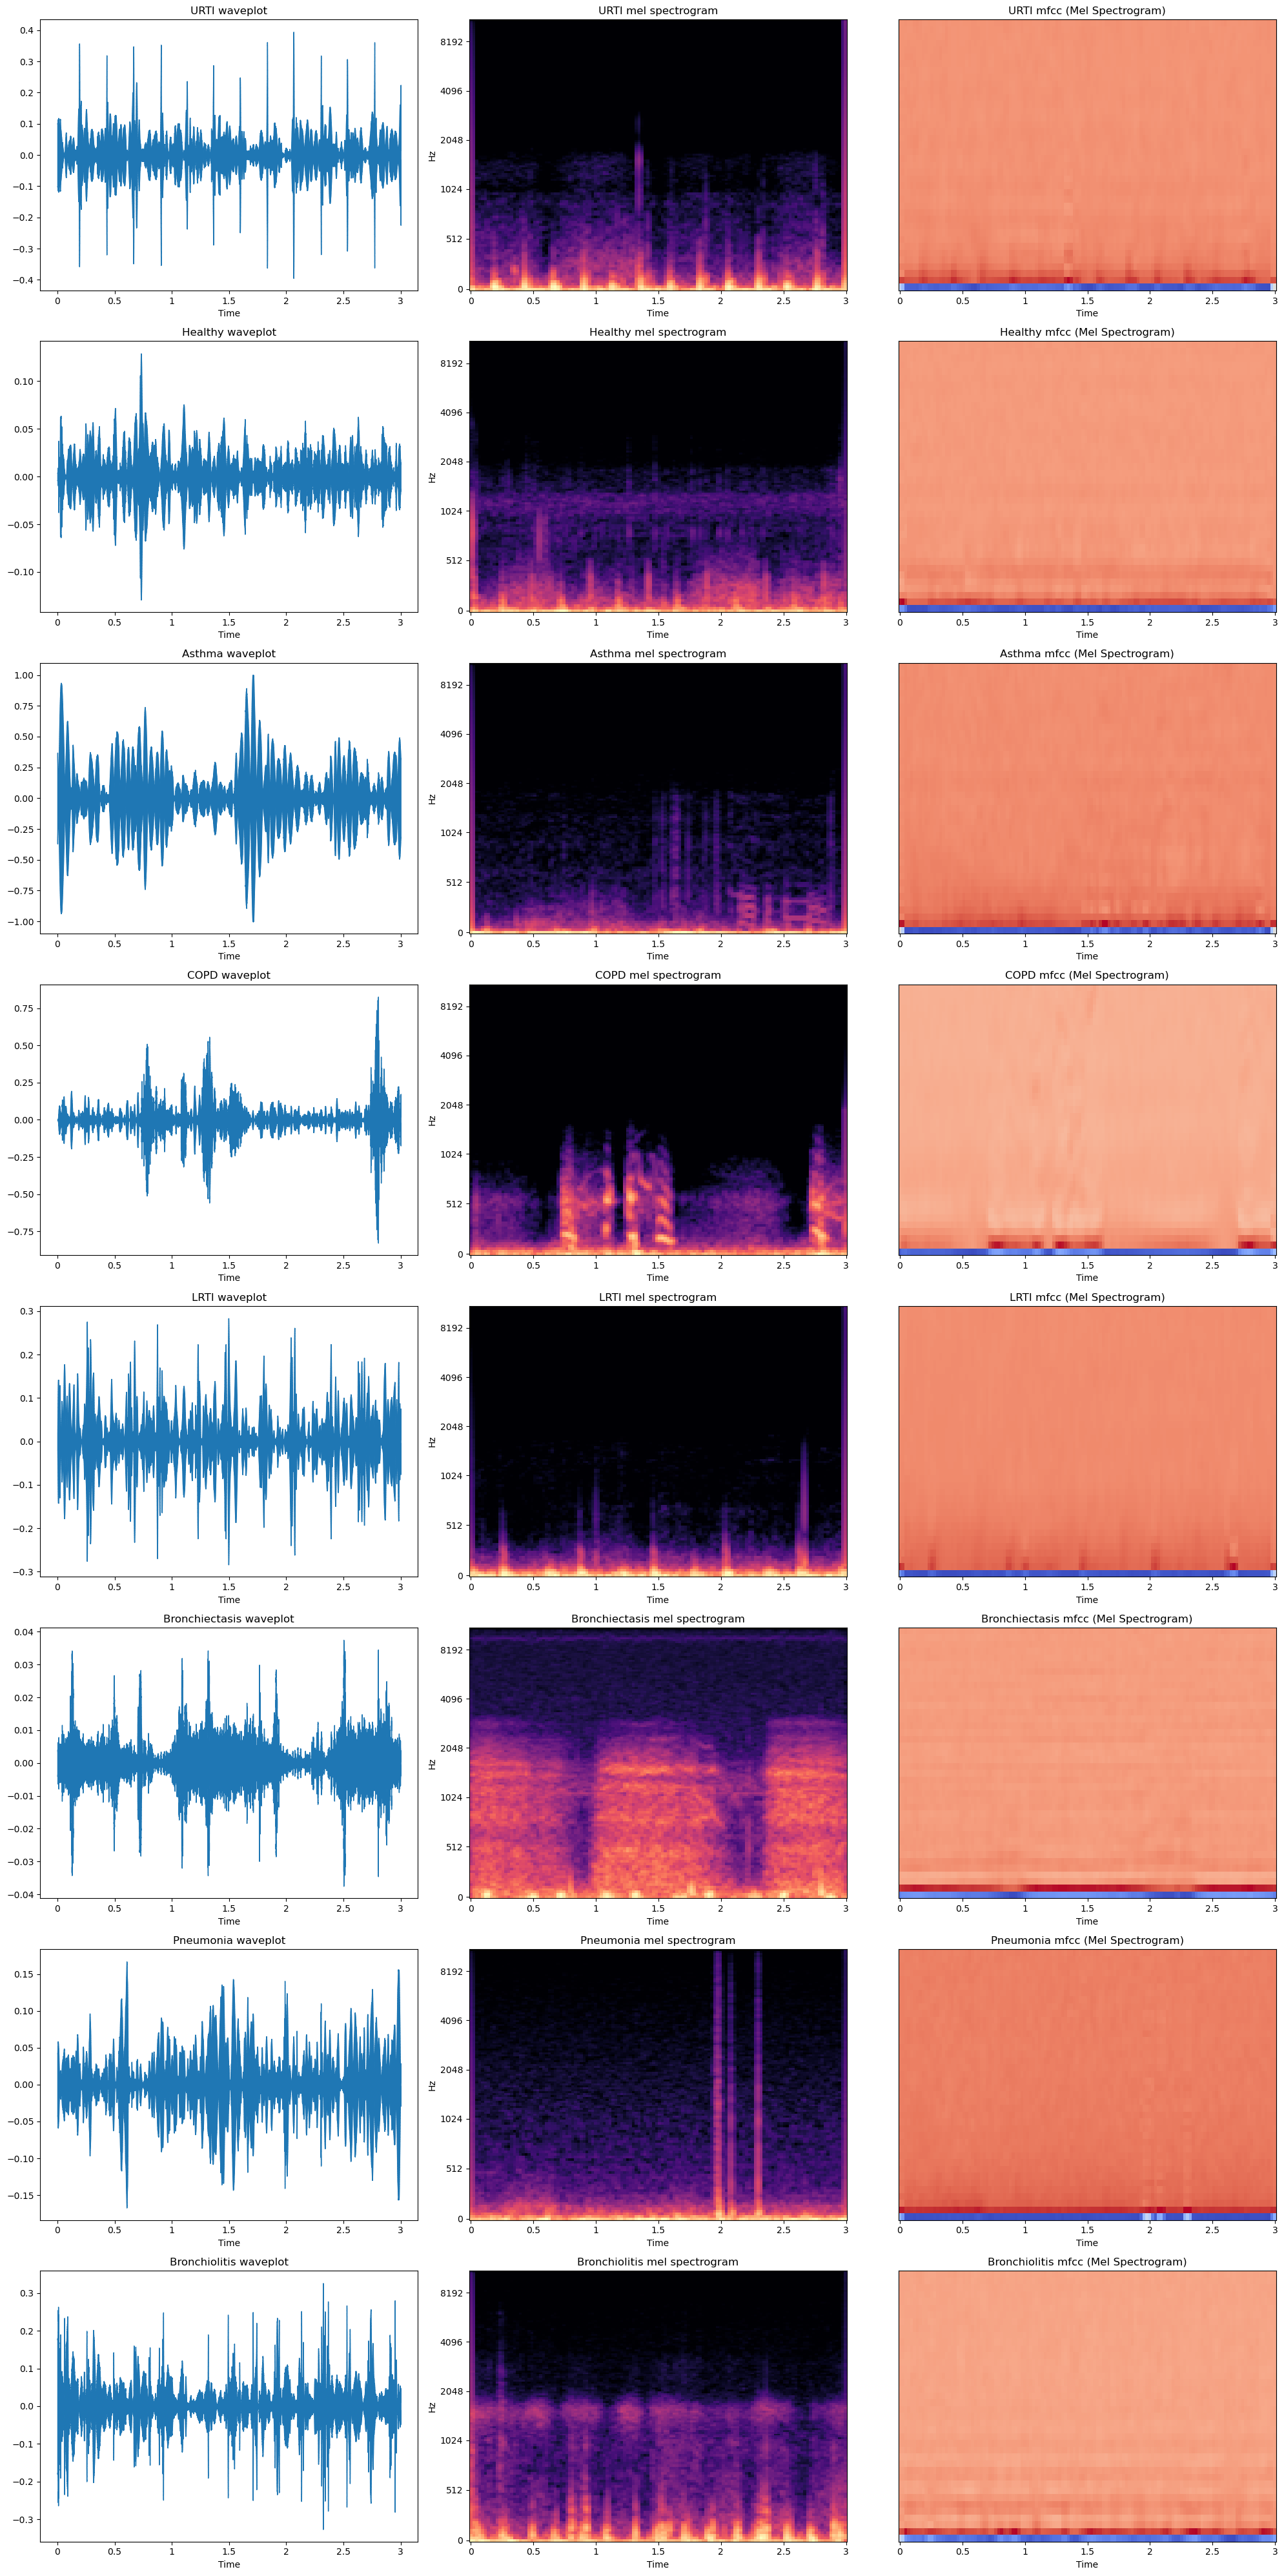

In [36]:
plt.figure(figsize=(20, 40))

idx = 0
for label in dataset.label.unique():
    y, sr = librosa.load(dataset[dataset.label == label].filename.iloc[1], duration=3)
    print(dataset[dataset.label == label].filename.iloc[1])

    # Wave plot
    idx += 1
    plt.subplot(8, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveshow(y, sr=sr)

    # Mel Spectrogram
    idx += 1
    plt.subplot(8, 3, idx)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectrogram" % label)

    # MFCC (Mel Spectrogram)
    idx += 1
    plt.subplot(8, 3, idx)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc (Mel Spectrogram)" % label)

plt.tight_layout() # Added for better layout
plt.show()

In [39]:

 # Function to extract feature vectors - Mel spectrograms are used in this study.
       # All parameters can be optimised.

def extract_features(audio_path, offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=3)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048,
                                    hop_length=512,
                                    n_mels=128)

    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)

    # mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs

In [40]:
from tqdm import tqdm


In [41]:
# [ ]: # Extracting features for all data

x_train = []
x_test = []

for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx], train.offset.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))

x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", train.shape)
print("X test:", test.shape)


100%|██████████| 1793/1793 [00:14<00:00, 122.44it/s]


X train: (7172, 3)
X test: (1793, 3)


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical

In [43]:
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                    classes=np.unique(y_train), 
                                                    y=y_train)

In [44]:
class_weights

array([128.07142857,   8.15      ,   8.965     ,   0.14341705,
         3.46138996,  56.03125   ,   3.4348659 ,   5.33630952])

In [49]:
 # Class weights corresponding to classes. COPD has largest data and hence maximum weight.
weight = {i: class_weights[i] for i in range(8)}
weight

{0: 128.07142857142858,
 1: 8.15,
 2: 8.965,
 3: 0.14341705327147655,
 4: 3.4613899613899615,
 5: 56.03125,
 6: 3.4348659003831417,
 7: 5.336309523809524}

In [50]:
# Reshape the data and get it ready with numerical class labels ready for training.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (7172, 40, 130, 1)
Y train: (7172, 8)
X test: (1793, 40, 130, 1)
Y test: (1793, 8)


In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D,GlobalAveragePooling2D

In [54]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.
shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(len(encoder.classes_), activation='softmax'))
#Visualise the structure
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 39, 129, 16)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 63, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 31, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 31, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 30, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 15, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 15, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 14, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,344 (173.22 KB)

 Trainable params: 44,344 (173.22 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [56]:
history = model.fit(x_train, y_train,
batch_size=128,
epochs=300,validation_data=(x_test, y_test),
shuffle=True, class_weight=weight)

Epoch 1/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.1017 - loss: 18.1118 - val_accuracy: 0.1366 - val_loss: 2.0121
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.2502 - loss: 2.4757 - val_accuracy: 0.6336 - val_loss: 1.8063
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.3849 - loss: 2.1630 - val_accuracy: 0.8355 - val_loss: 1.4610
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4792 - loss: 2.0838 - val_accuracy: 0.8383 - val_loss: 1.0267
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5902 - loss: 1.8663 - val_accuracy: 0.7987 - val_loss: 1.0447
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6065 - loss: 1.5975 - val_accuracy: 0.8065 - val_loss: 0.8836
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5950 - loss: 1.6984 - val_accuracy: 0.8522 - val_loss: 0.7152
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6472 - loss: 1.6556 - val_accuracy

Text(0.5, 1.0, 'Accuracy Curves')

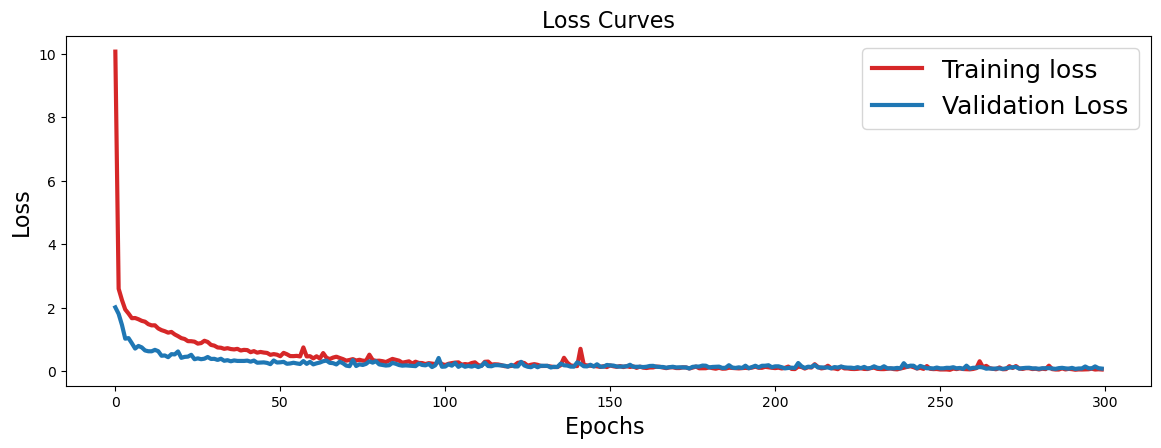

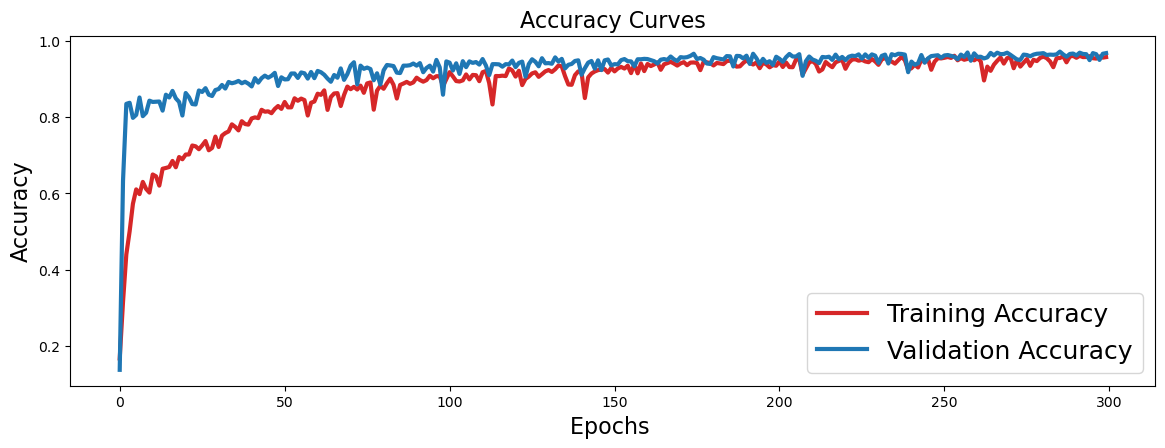

In [57]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [58]:
# Model performance on test set.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9685 - loss: 0.0879
Test loss: 0.0853852853178978
Test accuracy: 0.9687674045562744


In [60]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [62]:
# [28]: # All metrics are output here.
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [], []
classes = encoder.classes_

for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])

print(classification_report(y_true, y_pred))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                precision    recall  f1-score   support

        Asthma       1.00      1.00      1.00         2
Bronchiectasis       0.94      1.00      0.97        34
 Bronchiolitis       1.00      0.94      0.97        17
          COPD       1.00      0.97      0.98      1571
       Healthy       0.85      0.89      0.87        56
          LRTI       0.67      1.00      0.80         2
     Pneumonia       0.68      0.99      0.80        72
          URTI       0.84      0.97      0.90        39

      accuracy                           0.97      1793
     macro avg       0.87      0.97      0.91      1793
  weighted avg       0.98      0.97      0.97      1793



In [63]:
classes

array(['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy',
       'LRTI', 'Pneumonia', 'URTI'], dtype=object)

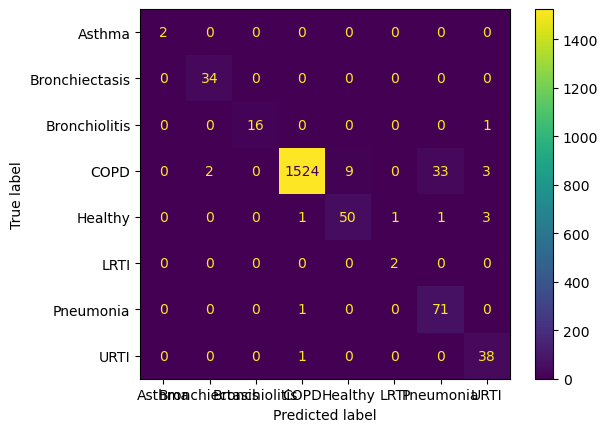

In [65]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =
confusion_matrix, display_labels=classes)
cm_display.plot()
plt.show()


In [66]:
# Save the model for future use.. Great idea as training takes a lot of time.
model_name = "lung.h5"
model.save(model_name)

In [67]:
# load model for further evaluations
from tensorflow.keras.models import load_model
model = load_model("lung.h5")

In [72]:
# # load and evaluate the saved model
from tensorflow.keras.models import load_model
import numpy as np
# # File to be classified
classify_file = r"C:\Users\ab2814\Desktop\ML\ICBHI\ICBHI\ICBHI_final_database//113_1b1_Ll_sc_Litt3200.wav"
test_x = []
test_x.append(extract_features(classify_file,0.5))
test_x = np.asarray(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
pred = model.predict(test_x,verbose=1)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[2.8965666e-38 5.4576211e-13 1.2555800e-20 1.0000000e+00 1.7619025e-24
  1.3698367e-19 1.0832414e-08 6.9724870e-09]]


In [73]:
# Predicted Class
pred_class = model.predict(test_x)
index = np.argmax(pred_class, axis=1)
print(classes[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
['COPD']


In [74]:
#check for correctness with the ground truth
actual = diagnosis.loc[diagnosis['ID'] == 113]
actual

,ID,Symptom
12,113,COPD


In [79]:
#Load the libraries
from tensorflow.keras.applications import vgg16, resnet
from tensorflow.keras.models import Model
import tensorflow.keras
from tensorflow.keras import layers

In [80]:
vgg = vgg16.VGG16(include_top=False, weights=None, input_shape=(x_train.
shape[1],x_train.shape[2],x_train.shape[3]))
# adding our own custom made Flatten layer on top of pretrained vgg16 Conv␣
layers
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

In [82]:
import pandas as pd

# Check out the status of all vgg layers so far
pd.set_option('max_colwidth', None)  # Use None for unlimited width

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_2, built=True>",input_layer_2,True
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,True
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,True
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,True
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,True
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,True
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,True
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,True
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,True
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,True


In [83]:
modelvgg = Sequential()
modelvgg.add(vgg_model)
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dense(len(encoder.classes_), activation='softmax'))
modelvgg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_28 (Functional)      │ (None, 2048)           │    14,713,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,766,728 (60.15 MB)

 Trainable params: 15,766,728 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
modelvgg.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

In [ ]:
history_vgg = modelvgg.fit(x_train, y_train,
batch_size=128,
epochs=150,
validation_data=(x_test, y_test),
shuffle=True)

Epoch 1/150
20/57 ━━━━━━━━━━━━━━━━━━━━ 2:14 4s/step - accuracy: 0.7169 - loss: 5.0209

In [ ]:
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history_vgg.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history_vgg.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
scores = modelvgg.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
#Look at the complete report.
predictions = modelvgg.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
y_true.append(classes[np.argmax(y_test[idx])])
y_pred.append(classes[np.argmax(prediction)])
print(classification_report(y_pred, y_true))

In [ ]:
classes